# Public Safety Notebook
## ~Ayaan Siddiqui
---

## This notebook aims at analyzing of the Safest Neighborhoods in Pittsburgh based on the criteria of criminal activities and their frequency of occurence.
#### *The dataset used in this notebook was taken from [Western Pennsylvania Regional Data Center] (https://data.wprdc.org/dataset/pgh/resource/bd152875-a14d-421a-8656-cc896a7e9074?inner_span=True)*

In [2]:
#import all required libraries
import pandas as pd
import geopandas as geo
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as pot

**The original dataset looks like the following:**

In [3]:
pub_safe = pd.read_csv("Public Safety 2010.csv", index_col = "Neighborhood")#reads the dataset csv file
pub_safe

,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
Neighborhood,,,,,,,,,,,,,,
Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,"2,669",92,184,73,3.4,6.9,0,0,12,9,24,12,29
West End,4,254,23,54,66,9.1,21.3,0,1,2,3,7,3,30
West Oakland,14,"2,604",82,65,80,3.1,2.5,1,1,13,4,14,8,13


---

## THIEVERY

### This section displays the analysis of the frequency of thefts committed in every neighborhood. This will be conducted taking into account crimes such as robberies, auto-thefts and burglaries.

#### **Up first, Auto-Theft:**

In [4]:
autotheft = pub_safe.groupby("Neighborhood").sum()['#Auto Theft (2010)']
autotheft

Neighborhood
Allegheny Center        5
Allegheny West          4
Allentown              11
Arlington               7
Arlington Heights       3
                       ..
Upper Lawrenceville    12
West End                3
West Oakland            8
Westwood                6
Windgap                 7
Name: #Auto Theft (2010), Length: 90, dtype: int64

---

#### **Up next, Burglaries:**

In [5]:
burglaries = pub_safe.groupby("Neighborhood").sum()['#Burglary (2010)']
burglaries

Neighborhood
Allegheny Center        8
Allegheny West          6
Allentown              48
Arlington              15
Arlington Heights       5
                       ..
Upper Lawrenceville    24
West End                7
West Oakland           14
Westwood               17
Windgap                 8
Name: #Burglary (2010), Length: 90, dtype: int64

---

#### **Lastly, Robberies:**

In [6]:
robbery = pub_safe.groupby("Neighborhood").sum()['#Robbery (2010)']
robbery

Neighborhood
Allegheny Center        9
Allegheny West          4
Allentown              15
Arlington               8
Arlington Heights       4
                       ..
Upper Lawrenceville    12
West End                2
West Oakland           13
Westwood                1
Windgap                 4
Name: #Robbery (2010), Length: 90, dtype: int64

---

## GRAPHICAL VISUALIZATION 

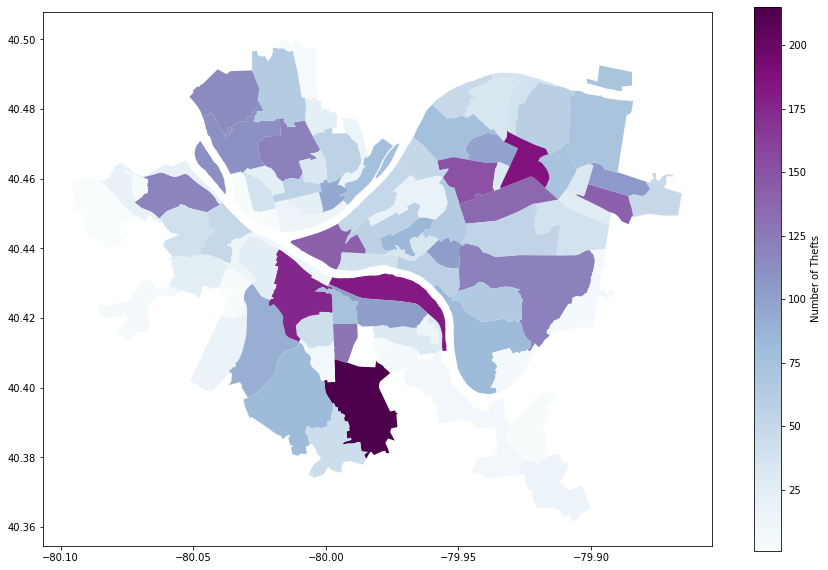

In [7]:
#Concatenating previous series into this dataframe
totaltheft = pd.concat([burglaries, autotheft, robbery], axis = 1, join='inner')
totaltheft["Total Thefts"] = np.nan #Makes a new empty column that stores the total number of thefts per neighborhood
#inserts value into each row of the new theft column
for x in range(len(totaltheft)):
    totaltheft.iloc[x,3] = 0
    for y in range(3):
        totaltheft.iloc[x,3] += totaltheft.iloc[x,y]
#Series for graphing total thefts
theft_graph = totaltheft.groupby("Neighborhood").sum()['Total Thefts']
neighborhood_bounds = geo.read_file("pittsburgh-pa-neighborhoods.shp") #Reads shape (SHP) file for Pittsburgh neighborhoods
#Displaying map
thefts_map = neighborhood_bounds.merge(theft_graph, how='left', left_on='hood', right_on='Neighborhood')
thefts_map.plot(column='Total Thefts',cmap='BuPu',figsize=(15,10), legend=True,legend_kwds={'label':"Number of Thefts"})

### Cities with the most amount of thefts are:

In [8]:
totaltheft = totaltheft.sort_values(by=['Total Thefts'], ascending=False)
totaltheft

,#Burglary (2010),#Auto Theft (2010),#Robbery (2010),Total Thefts
Neighborhood,,,,
Carrick,118,48,49,215.0
East Liberty,64,59,63,186.0
South Side Flats,74,56,52,182.0
Mount Washington,115,38,22,175.0
Bloomfield,70,36,45,151.0
...,...,...,...,...
Summer Hill,2,2,0,4.0
Chateau,0,2,1,3.0
Ridgemont,3,0,0,3.0


### ***Carrick*** appears to be the worst neighborhood in terms of Thefts!!
---

## DRUG ABUSE

### This section wiil analyze the frequency of drug violations reported per neighborhood .

In [9]:
drug_violations = pub_safe.groupby("Neighborhood").sum()['#Drug Violations (2010)']
drug_violations = drug_violations.sort_values(ascending=False)
drug_violations

Neighborhood
Knoxville           113
Middle Hill         102
Crawford-Roberts     90
Perry South          87
East Allegheny       73
                   ... 
St. Clair             0
Swisshelm Park        0
Lincoln Place         0
East Carnegie         0
Fairywood             0
Name: #Drug Violations (2010), Length: 90, dtype: int64

---
## GRAPHICAL VISUALIZATION

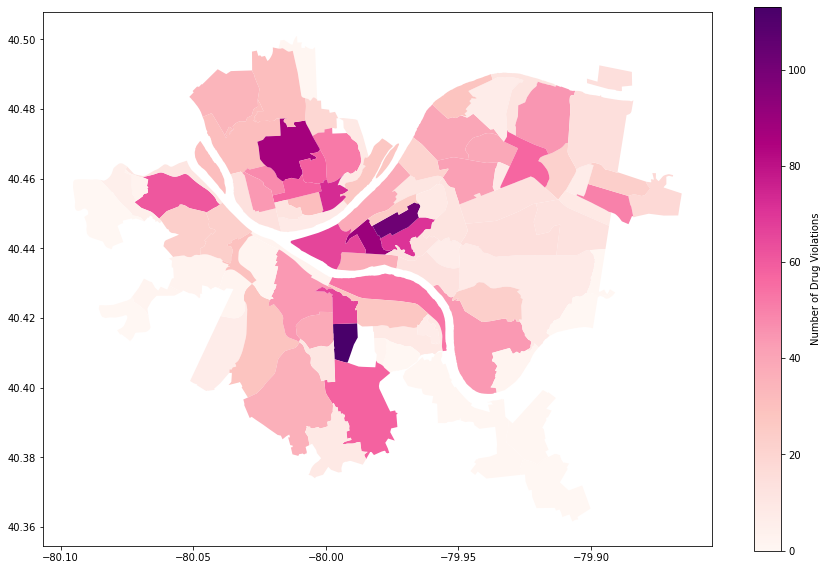

In [10]:
neighborhoods = geo.read_file("pittsburgh-pa-neighborhoods.shp")
drug_map = neighborhoods.merge(drug_violations, how='left', left_on='hood', right_on='Neighborhood')
drug_map.plot(column='#Drug Violations (2010)',cmap='RdPu',figsize=(15,10), legend=True,legend_kwds={'label':"Number of Drug Violations"})

### ***Knoxville*** appears to be the neighborhood with the highest number of drug violatiions

---

## THE *FINAL* STREEEETCH

### Which neigborhood *is* the safest in terms of reported criminal activities?

In [11]:
thefts = totaltheft.groupby("Neighborhood").sum()['Total Thefts']
best_neighborhood = pd.concat([thefts, drug_violations], axis = 1, join='inner') #joins dataframe from thefts and drug violations
best_neighborhood["Final Score"] = np.nan #New column for scores

#inserts values for each row in the new column. Score for each neighborhood
for x in range(len(best_neighborhood)):
    best_neighborhood.iloc[x,2] = 0
    for y in range(2):
        best_neighborhood.iloc[x,2] += best_neighborhood.iloc[x,y]
#Sorts the scores from lowest to highest
best_neighborhood = best_neighborhood.sort_values(by=['Final Score'], ascending=True)
best_neighborhood

,Total Thefts,#Drug Violations (2010),Final Score
Neighborhood,,,
Fairywood,1.0,0,1.0
New Homestead,3.0,1,4.0
East Carnegie,5.0,0,5.0
Ridgemont,3.0,2,5.0
Summer Hill,4.0,1,5.0
...,...,...,...
Mount Washington,175.0,44,219.0
South Side Flats,182.0,53,235.0
Knoxville,129.0,113,242.0


---
# **RESULTS:**
## Top 10 Neighborhoods in Pittsburgh :

In [12]:
best_neighborhood.head(10)

,Total Thefts,#Drug Violations (2010),Final Score
Neighborhood,,,
Fairywood,1.0,0,1.0
New Homestead,3.0,1,4.0
East Carnegie,5.0,0,5.0
Ridgemont,3.0,2,5.0
Summer Hill,4.0,1,5.0
St. Clair,6.0,0,6.0
Mt. Oliver,4.0,2,6.0
Swisshelm Park,6.0,0,6.0
Oakwood,5.0,2,7.0


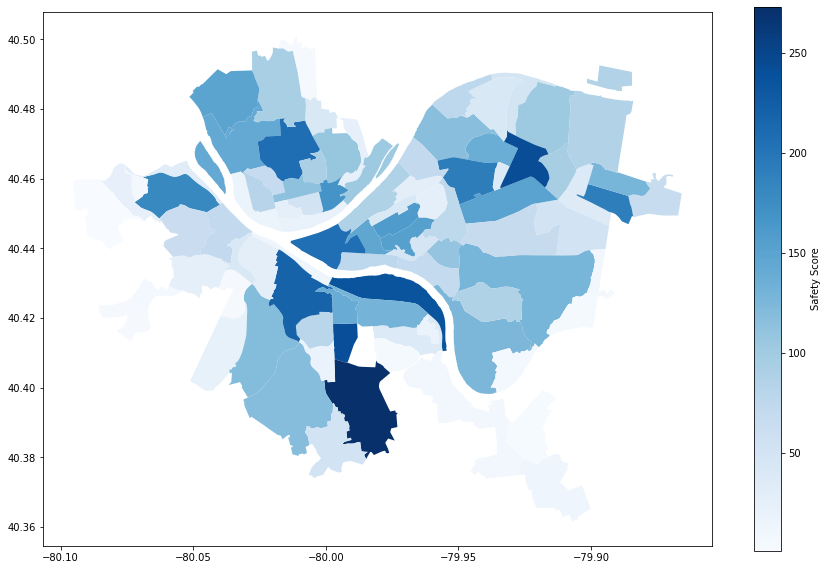

In [15]:
best_neighborhood = best_neighborhood.sort_values(by=['Final Score'], ascending=False)
best_map = neighborhoods.merge(best_neighborhood, how='left', left_on='hood', right_on='Neighborhood')
best_map.plot(column='Final Score',cmap='Blues',figsize=(15,10), legend=True,legend_kwds={'label':"Safety Score"})